<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PERFORMANCE ANALYSIS </strong></span></b> </div> 

# ***1.BUSINESS UNDERSTANDING***

- East African Breweries Limited (EABL) faces persistent challenges related to stock price volatility and regulatory pressures.

- Over the last decade, EABL has experienced fluctuating stock prices, negatively impacting investor confidence and stability.

- Recent regulatory measures, including stringent filing requirements by the Kenya Revenue Authority, add to the company's challenges.

- This notebook aims to devise data-driven strategies to address these issues and stabilize EABL's stock performance.

- The goal is to mitigate regulatory risks, foster sustained growth in shareholder value, and enhance EABL's resilience in a dynamic industry environment.

## ***Objectives***
- Build a robust time series model leveraging market indicators to forecast future EABL stock prices. 
- Investigate viability of investing in EABL stock prices. 
- Build an anomally detection system to identify unusual or unexpected patterns in EABL stock prices. 

------------------------------

# ***2.DATA UNDERSTANDING***

- Load and inspect the data: Check the structure and completeness of the dataset.
- Data preprocessing: Handle missing values, convert data types if necessary, and set the date column as the index for time series analysis.
- Volatility Insights:
   - Calculate and visualize stock price volatility.
   - Develop a risk model based on historical volatility.
- Abnormal Trade Volume Analysis:
   - Identify and analyze spikes or drops in trade volumes.
- Dividend Analysis:
   - Examine the trend in dividend payouts.
- Trend Analysis:
   - Apply moving averages, trend decomposition, and autocorrelation analysis.
- Lag Analysis:
   - Investigate the influence of external factors like inflation rates, GDP, USD exchange rates, and unemployment rates on EABL stock performance.
- Stock Valuation:
   - Estimate the intrinsic value of EABL stocks using relevant financial metrics.

In [28]:
import pandas as pd

# Load the dataset
csv_path = r"C:\Users\ADMIN\OneDrive\Desktop\DEREK\dsc-capstone-project_finale\data\processed\final_merge.csv"
data = pd.read_csv(csv_path)

# Display the first few rows of the dataset to understand its structure
data


,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.90,161.0000,1.00,0.0,NaN
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.90,161.0000,1.00,0.0,NaN
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.90,162.0000,1.00,0.0,NaN
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.90,162.0000,1.00,0.0,NaN
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.90,163.0000,1.75,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4348,4348,9/15/2006,141.00,142.00,140.0,141.0,141.00,226100,9,2006,15,5.7,5.93,73.3144,NaN,5.9,8.3
4349,4349,9/14/2006,140.00,143.00,140.0,140.0,141.00,108500,9,2006,14,5.7,5.93,73.3178,NaN,5.9,8.3
4350,4350,9/13/2006,141.00,144.00,140.0,142.0,141.00,190000,9,2006,13,5.7,5.93,73.2778,NaN,5.9,8.3
4351,4351,9/12/2006,141.00,143.00,140.0,140.0,140.00,123900,9,2006,12,5.7,5.93,72.8644,NaN,5.9,8.3


In [29]:
data.dtypes


Unnamed: 0                    int64
Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
dtype: object

- Date: The date of the stock data (object type, which we'll convert to datetime for time series analysis).

- Open, High, Low, Close, Average: Stock prices at the open, high, low, and close of the trading day, along with the average price (float64).

- Volume: The number of shares traded (int64).

- Month, Year, Day: Components of the date (int64).

- Annual Average Inflation: Not provided in the sample data (float64, contains NaNs).

- 12-Month Inflation: Inflation rate over 12 months (float64).

- Mean: Possibly related to stock price or economic indicator (float64).

- Amount: Related to dividends (float64).

- Dividends per share: Dividend payout per share (float64).

- Earnings Per Share: Earnings per share (float64, contains NaNs).

In [30]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values in key columns
missing_values = data.isnull().sum()

missing_values


Unnamed: 0                    0
Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation     21
12-Month Inflation            0
Mean                         12
Amount                      112
Dividends per share           0
Earnings Per Share           21
dtype: int64

The dataset contains missing values in several columns, notably in "Annual Average Inflation," "Mean," "Amount," and "Earnings Per Share." Here's how we'll address these missing values for our analysis:

- ***Annual Average Inflation and Earnings Per Share:***

 Given the nature of our analysis, we will fill missing values with forward fill (using the last known value)because our analysis requires continuous data

- ***Mean and Amount:***

 calculate the mean based on available data.

- ***Amount:*** 

Since this column is related to dividends and shows a significant number of missing values, we'll need to assess whether the missing data points to periods without dividend payouts or if they represent data collection gaps.

In [31]:
# Fill missing values forward
data_filled = data.fillna(method='ffill')

# Verify the handling of missing values by checking again
missing_values_after_filling = data_filled.isnull().sum()

missing_values_after_filling


Unnamed: 0                   0
Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Annual Average Inflation    21
12-Month Inflation           0
Mean                         0
Amount                       0
Dividends per share          0
Earnings Per Share          21
dtype: int64

## ***Volatility Insights***

Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. We'll calculate the historical volatility of EABL's stock, using the standard deviation of daily returns as a proxy for volatility.

For this purpose, we need to:

- Calculate the daily returns of EABL's stock.
- Define and implement a method within the VolatilityInsights class to calculate the rolling standard deviation of these returns, which represents the volatility.
- Visualize the volatility over time to identify any patterns or trends.

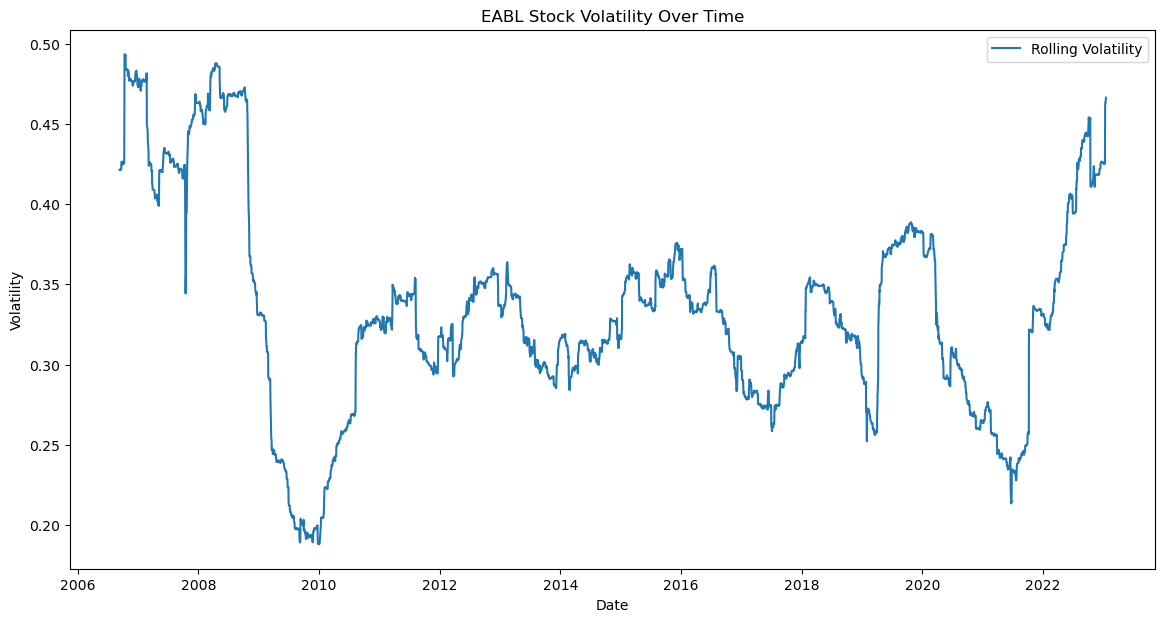

Latest Calculated Volatility Rate: 42.13%


0.42128649869728974

In [34]:
import numpy as np
import matplotlib.pyplot as plt


class VolatilityInsights:
    """
    A class to calculate and analyze stock volatility, including displaying the calculated volatility rate.
    """
    def __init__(self, data):
        self.data = data
        self.data['Returns'] = self.data['Close'].pct_change()
        
    def calculate_volatility(self, window=252):
        """
        Calculate rolling volatility using the standard deviation of daily returns,
        and return the last calculated volatility rate.
        """
        self.data['Volatility'] = self.data['Returns'].rolling(window=window).std() * np.sqrt(window)
        return self.data['Volatility'].iloc[-1]  # Return the latest volatility rate
    
    def plot_volatility(self):
        """
        Plot the rolling volatility over time, including the latest calculated volatility rate.
        """
        plt.figure(figsize=(14, 7))
        plt.plot(self.data['Date'], self.data['Volatility'], label='Rolling Volatility')
        plt.title('EABL Stock Volatility Over Time')
        plt.xlabel('Date')
        plt.ylabel('Volatility')
        plt.legend()
        plt.show()
        
        # Display the latest calculated volatility rate
        latest_volatility_rate = self.data['Volatility'].iloc[-1]
        print(f"Latest Calculated Volatility Rate: {latest_volatility_rate * 100:.2f}%")

# Initialize the refactored class with the filled data
volatility_insights= VolatilityInsights(data_filled)

# Calculate volatility and get the latest rate
latest_volatility_rate = volatility_insights.calculate_volatility()

# Plotting volatility with the latest calculated rate displayed
volatility_insights.plot_volatility()

# Display the latest calculated volatility rate
latest_volatility_rate


## ***Interpretation:***
- The latest calculated ***volatility rate of 42.13%*** indicates the degree of variation or dispersion of returns for EABL stock over the selected period. This relatively high volatility rate suggests that the stock has experienced significant price movements, which can be a double-edged sword for investors.

- High volatility might attract traders looking for short-term gains from price fluctuations. However, it also implies higher risk, as the stock's value can change dramatically in a short period.

## ***Insight:***
- Given this level of volatility, investors should carefully consider their risk tolerance and investment horizon before making decisions. Those with a lower risk tolerance might look for ways to mitigate risk, such as diversifying their investment portfolio or using financial derivatives for hedging. Conversely, investors comfortable with higher risk might view this as an opportunity to potentially achieve higher returns, keeping in mind the increased uncertainty involved.

## ***Abnormal Trade Volume Spikes***
 

- We'll focus on identifying and understanding instances where EABL's trading volume significantly deviates from its typical levels. Such spikes can indicate a variety of market conditions or events, such as new product launches, earnings reports, changes in management, or broader economic news impacting the stock. 

- Detecting these spikes can provide valuable insights into potential market sentiment changes or upcoming volatility

- We'll use a z-score approach to identify outliers in trading volumes. The z-score measures the number of standard deviations an element is from the mean. Typically, a z-score above 2 or below -2 is considered abnormal.